In [1]:
import torch 
from torch import nn 
import pandas as pd 
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.nn.functional import mse_loss

In [2]:
class PoissonRegression(nn.Module):
    def __init__(self, in_dim):
        super().__init__()
        self.w = nn.Linear(in_dim, 1)  
        nn.init.normal_(self.w.weight, 0, .01)  
        nn.init.constant_(self.w.bias, 0)

    def forward(self, x):
        return torch.exp(self.w(x))
    
def poisson_loss(y_hat, y):
    loss = torch.mean(y_hat - y * torch.log(y_hat))
    return loss

In [3]:
df = pd.read_csv("HW1_poisson_regression_data.csv")

X = df[['X1', 'X2', 'X3', 'X4', 'X5']].values
y = df['Y'].values

X_tensor = torch.tensor(X, dtype=torch.float)
y_tensor = torch.tensor(y, dtype=torch.float)

df.head(n=10)

,Y,X1,X2,X3,X4,X5
0,5,0.422447,0.971883,0.533636,0.058229,0.912143
1,2,0.382487,0.507943,0.950425,0.174120,0.551095
2,4,0.742815,0.789894,0.374025,0.320585,0.286143
3,6,0.905309,0.093778,0.552340,0.909098,0.836523
4,7,0.557285,0.567502,0.552205,0.988464,0.989089
5,3,0.708192,0.949948,0.151380,0.110029,0.491539
6,2,0.547922,0.835359,0.242528,0.908562,0.180607
7,1,0.262783,0.214829,0.468023,0.839837,0.004941
8,13,0.886888,0.567713,0.657572,0.311464,0.879461
9,3,0.279256,0.168646,0.441679,0.164778,0.623770


In [4]:
model = PoissonRegression(in_dim=5)

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

max_epochs = 1000
batch_size = 32

dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# lists to store loss and MSE values
loss_history = []
mse_history = []

for epoch in range(max_epochs):

    for x_batch, y_batch in dataloader:
        y_hat = model(x_batch)
        loss = poisson_loss(y_hat, y_batch)
        mse = mse_loss(y_hat, y_batch.unsqueeze(1), reduction='mean')
       
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss_history.append(loss.item())
    mse_history.append(mse.item())

    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}, MSE: {mse:.4f}")

# After training, check model parameters
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.data}")

Epoch 0, Loss: 0.3592326045036316, MSE: 16.9577
Epoch 20, Loss: -4.5003156661987305, MSE: 36.6645
Epoch 40, Loss: -3.210230588912964, MSE: 19.1162
Epoch 60, Loss: -2.2181508541107178, MSE: 10.2717
Epoch 80, Loss: -4.463136196136475, MSE: 27.1496
Epoch 100, Loss: -1.152472734451294, MSE: 6.8575
Epoch 120, Loss: -5.613916397094727, MSE: 66.0387
Epoch 140, Loss: -5.388947486877441, MSE: 79.0067
Epoch 160, Loss: -0.12387394905090332, MSE: 15.8548
Epoch 180, Loss: 0.16124770045280457, MSE: 5.4298
Epoch 200, Loss: 1.0899252891540527, MSE: 9.7699
Epoch 220, Loss: -0.6478701829910278, MSE: 9.9053
Epoch 240, Loss: -2.731973886489868, MSE: 13.7152
Epoch 260, Loss: -3.1296634674072266, MSE: 9.5168
Epoch 280, Loss: -3.638622283935547, MSE: 17.1657
Epoch 300, Loss: -0.8484793305397034, MSE: 5.1116
Epoch 320, Loss: -2.0533597469329834, MSE: 7.4563
Epoch 340, Loss: 1.74629545211792, MSE: 8.5326
Epoch 360, Loss: 0.9207884073257446, MSE: 6.5165
Epoch 380, Loss: -4.037039756774902, MSE: 25.7735
Epoch 40

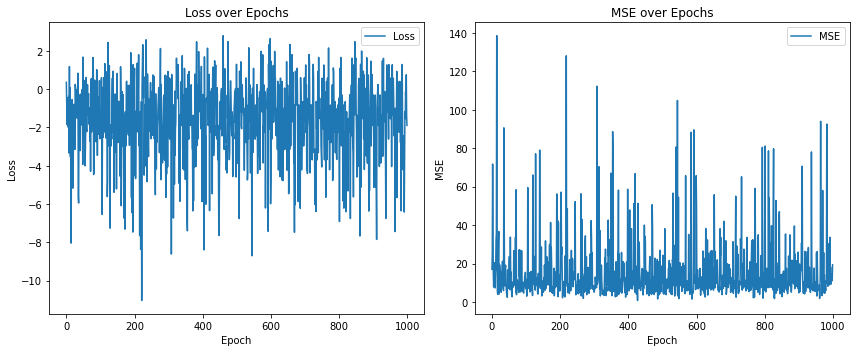

In [5]:
import matplotlib.pyplot as plt

# Plotting the losses
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_history, label='Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mse_history, label='MSE')
plt.title('MSE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()